In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [7]:
dataset = pd.read_csv('car data.csv')

In [8]:
#Our dataset
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
#First five rows of dataset
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
dataset.shape

(301, 9)

In [13]:
#Number of missing values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [24]:
dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':0}}, inplace=True)
dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [25]:
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [29]:
# Assuming dataset is your pandas DataFrame
columns_to_select = ['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
x = dataset[columns_to_select]
y = dataset['Selling_Price']


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

In [31]:
# Linear Regression model 
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [32]:
predict = reg.predict(x_train)

In [44]:
score = reg.score(x_train,y_train)
print('Score', score )

Score 0.8826132160301751


In [36]:
error = metrics.r2_score(y_train,predict)
print('Error: ', error)

Error:  0.8826132160301751


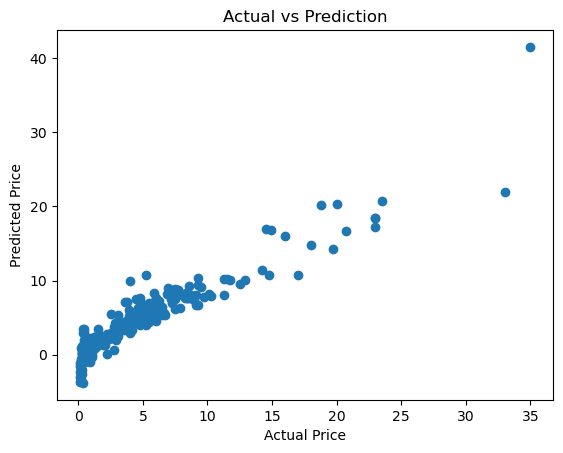

In [37]:
plt.scatter(y_train,predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Prediction')
plt.show()

In [50]:
test_predict = reg.predict(x_test)

In [52]:
test_predict

array([10.47773866,  0.77354151,  4.23399743,  5.01539967,  9.82085194,
        4.22574584,  3.36968766,  7.49892816,  0.22736892,  5.14979635,
        6.19163362,  6.29281684,  2.18295984,  7.70682577,  1.88744927,
        1.79758408,  2.09525081,  1.91560737,  9.41629084,  4.22432061,
        1.56744637,  9.21850537,  1.52519034,  9.58627517,  0.90235286,
        8.18389633,  1.59558094, -3.146453  ,  4.23075617,  2.13032121,
        3.50237708])

In [56]:
reg.score(x_test,y_test)

0.8691076099518825

In [39]:
error = metrics.r2_score(y_test,test_predict)
print('Error: ', error)

Error:  0.8691076099518825


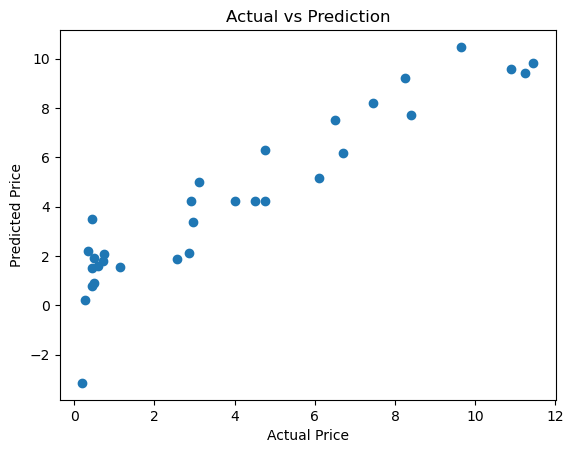

In [40]:
plt.scatter(y_test,test_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Prediction')
plt.show()

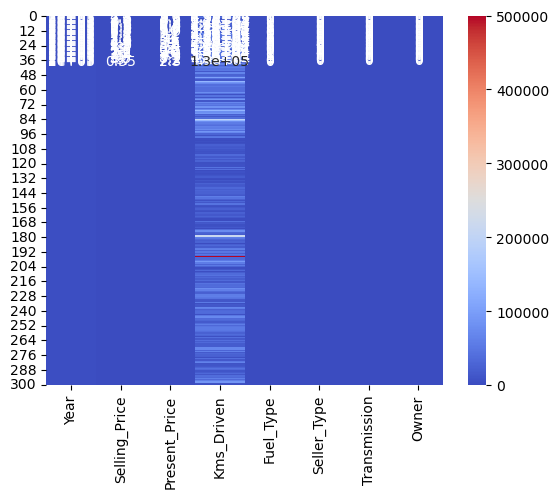

In [63]:

# Assuming 'dataset' is your DataFrame
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])

# Create heatmap
sns.heatmap(numeric_dataset,cmap='coolwarm',annot=True)
plt.show()
